In [73]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from insightface.app import FaceAnalysis

In [74]:
model = FaceAnalysis(name="buffalo_l", providers=['CPUExecutionProvider'])
model.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\khadi/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\khadi/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\khadi/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\khadi/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\khadi/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

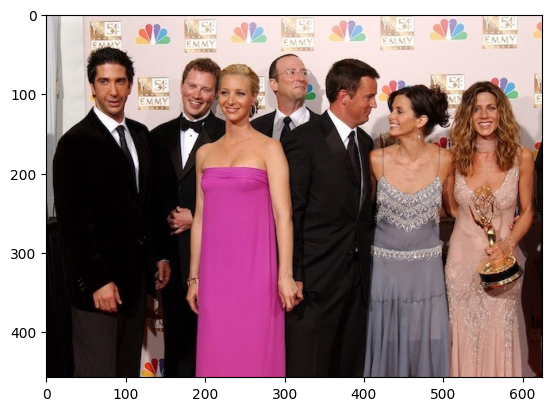

In [75]:
input_image = cv2.imread("photo\enhanced-10470-1406125861-9.jpg")
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)

In [76]:
results = model.get(input_image)
results

[{'bbox': array([217.94917,  80.02183, 260.4428 , 134.71823], dtype=float32),
  'kps': array([[225.82495 ,  99.42247 ],
         [245.55893 ,  99.77009 ],
         [233.13861 , 112.19186 ],
         [227.24774 , 118.194336],
         [245.38394 , 118.54079 ]], dtype=float32),
  'det_score': 0.905633,
  'landmark_3d_68': array([[ 2.13535934e+02,  9.44824905e+01,  3.43378677e+01],
         [ 2.13720505e+02,  1.01038727e+02,  3.47697868e+01],
         [ 2.13926727e+02,  1.07879265e+02,  3.45331879e+01],
         [ 2.14505432e+02,  1.14623787e+02,  3.28174706e+01],
         [ 2.15820160e+02,  1.21201683e+02,  2.82447643e+01],
         [ 2.18676788e+02,  1.26137749e+02,  2.39814358e+01],
         [ 2.22165482e+02,  1.29634109e+02,  1.99979172e+01],
         [ 2.26349472e+02,  1.32095901e+02,  1.47982073e+01],
         [ 2.33117767e+02,  1.34136215e+02,  1.21524248e+01],
         [ 2.40443085e+02,  1.33067566e+02,  1.36642971e+01],
         [ 2.46350266e+02,  1.30506683e+02,  1.82969456e+01]

In [77]:
face_bank = np.load("face_bank.npy", allow_pickle=True)


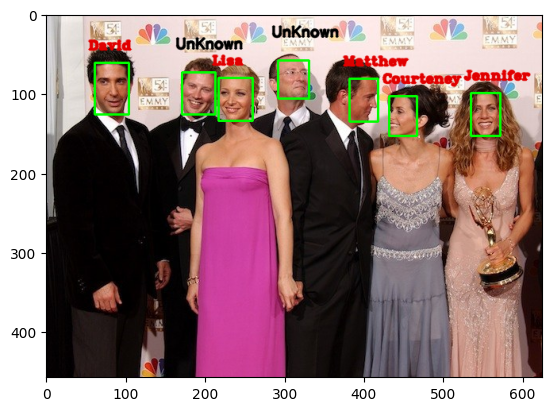

In [78]:
threshold = 25

result_image = input_image.copy()

for result in results:
    bbox = result.bbox
    
    x, y, w, h = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
    cv2.rectangle(result_image, (x, y), (w, h), (0, 255, 0), 2)
    
    
    for person in face_bank:
        face_bank_person_embedding = person["embedding"]
        new_person_embedding = result["embedding"]

        distance = np.sqrt(np.sum((face_bank_person_embedding - new_person_embedding)**2))
        
        if distance < threshold:
            
            cv2.putText(result_image,person["name"],
                    (int(bbox[0])-8 , int(bbox[1]) -17),
                    cv2.FONT_HERSHEY_COMPLEX_SMALL,0.8,(225,0,0), 2, cv2.LINE_AA)

            break
    else:
        cv2.putText(result_image, "UnKnown",
                    (int(bbox[0])-8 , int(bbox[1])-30 ),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6 , (0, 0, 0), 2, cv2.LINE_AA)

plt.imshow(result_image)

